In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Означення

Кластерний аналіз (англ. Data clustering) — задача розбиття заданої вибірки об'єктів (ситуацій) на підмножини, які називаються кластерами, так, щоб кожен кластер складався зі схожих об'єктів, а об'єкти різних кластерів істотно відрізнялися. Задача кластеризації належить до статистичної обробки, а також до широкого класу завдань некерованого навчання.

Кластериза́ція ме́тодом k-сере́дніх (англ. k-means clustering) - впорядкування множини об'єктів у порівняно однорідні групи.

Мета методу - розділити $n$ спостережень на $k$ кластерів, так щоб кожне спостереження належало до кластера з найближчим до нього середнім значенням. Метод базується на мінімізації суми квадратів відстаней між кожним спостереженням та центром його кластера, тобто функції:

\begin{equation}
    J = \sum_{i=1}^{n} \sum_{j=1}^{k} (x_i - с_j)^2
\end{equation}

де $k$ — число кластерів, $n$ — число спостережень, $x_i$ - $i$-те спостереження, $c_j$ - центри мас $j$-го кластера.

Фунцкція $J$ - це функція втрат, котру для кластеризації ще називають `distortion`.

## Алгоритм методу «Кластеризація за схемою k-середніх»:

Маємо масив спостережень (об'єктів), кожен з яких має певні значення за рядом ознак. Відповідно до цих значень об'єкт розташовується у багатовимірному просторі.

1. Дослідник визначає кількість кластерів, що необхідно утворити.
2. Випадковим чином обирається $n$ спостережень, які на цьому кроці вважаються центрами кластерів.
3. Кожне спостереження «приписується» до одного з $k$ кластерів — того, відстань до якого найкоротша.
4. Розраховується новий центр кожного кластера як елемент, ознаки якого розраховуються як середнє арифметичне ознак об'єктів, що входять у цей кластер.
5. Відбувається така кількість ітерацій (повторюються кроки 3-4), поки кластерні центри стануть стійкими (тобто при кожній ітерації в кожен кластер потрапляють одні й ті самі об'єкти), дисперсія всередині кластера буде мінімізована, а між кластерами — максимізована.

Вибір кількості кластерів робиться на основі дослідницької гіпотези. Якщо її немає, то рекомендують спочатку створити 2 кластери, далі 3, 4, 5, порівнюючи отримані результати.

# Посилання

1. [Алгоритм кластеризации Ллойда (K-средних, K-means)](https://www.youtube.com/watch?v=8vCuR1AndH0)
2. [Модель кластеризации KMeans](https://www.youtube.com/watch?v=EHZJMz6zyFE&ab_channel=machinelearrrning)
3. [Документация skikit-learn. 2.3. Кластеризация](https://scikit-learn.ru/clustering/#)
4. [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
5. [Кластеризуем лучше, чем «метод локтя»](https://habr.com/ru/companies/jetinfosystems/articles/467745/)
6. [Кластерный анализ](https://www.dmitrymakarov.ru/intro/clustering-16/)

# Завантаження даних

In [7]:
data_2d = pd.read_csv("data/data_2d.csv", header=None)
mnist = pd.read_csv("data/mnist.csv", header=None)
mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Функція для визначення оптимальної кількості кластерів за ліктевим методом

## Метод "ліктя"

Метод ліктя передбачає багаторазове циклічне виконання алгоритму зі збільшенням кількості кластерів, а також подальшим відкладанням на графіку функції втрат (`distortion`).

Характерный график выглядит так:

![Alt text](image/kmean.png)

Графік "ліктя" показує залежність функції втрат $V$ від кількості кластерів $k$. Якщо на графіку можна виокремити точку згину (так званий "лікоть"), то це може свідчити про те, що відповідна кількість кластерів є оптимальною.

In [3]:
def find_optimal_clusters(data, max_clusters):
    """
    Find the optimal number of clusters using the 'Elbow Method' for K-Means clustering.

    Parameters:
        data (array-like): The input data for clustering.
        max_clusters (int): The maximum number of clusters to consider.

    Returns:
        None

    This function calculates the distortion (inertia) for different numbers of clusters
    ranging from 1 to max_clusters and plots a 'Elbow Method' graph to help choose the
    optimal number of clusters for K-Means clustering. The point where the distortion
    starts to decrease at a slower rate often indicates the optimal number of clusters.
    """
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), distortions)
    plt.plot(range(1, max_clusters + 1), distortions)
    plt.xticks(range(1, max_clusters + 1), rotation=45)
    plt.xlabel(r'Кількість кластерів, $k$')
    plt.ylabel(r'Функція втрат (дисторсія)')
    plt.title('Графік ліктя')
    plt.grid()
    plt.show()

# Знаходження оптимальної кількості кластерів

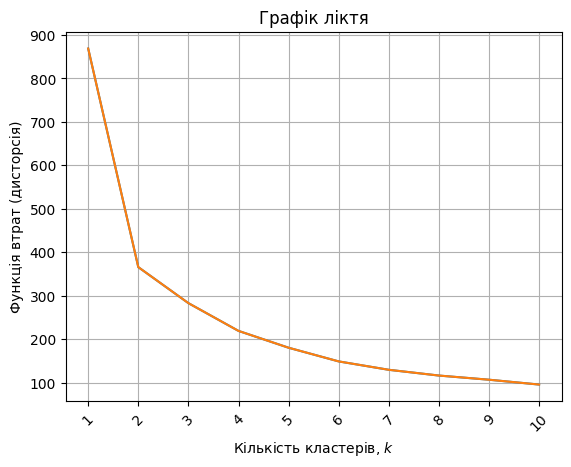

In [10]:
# Для двовимірного датасету
find_optimal_clusters(data_2d, max_clusters=10)

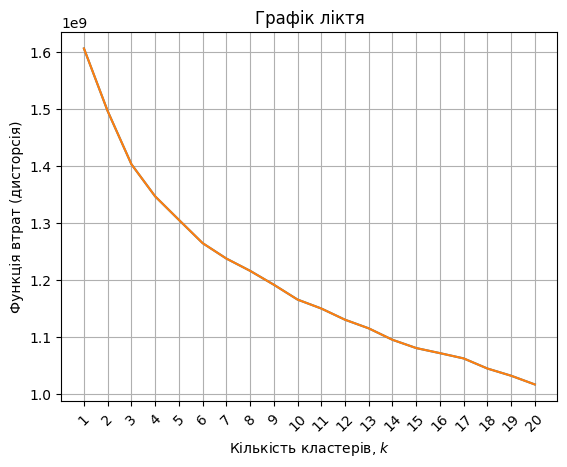

In [16]:
# Для датасету MNIST
find_optimal_clusters(mnist, max_clusters=20)

Судячи з графіків:

1. Число кластерів для `data_2d` дорівнює $2$.
2. Число кластерів для `mnist` дорівнює скоріше за все $6$.

In [17]:
k_data_2d = 2
k_mnist = 6